<a href="https://colab.research.google.com/github/Andru-1987/86400_data_science_i_diplomatura/blob/main/07_aprendizaje_supervisado/clase_practica/01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresion Lineal](https://cienciadedatos.net/documentos/py10-regresion-lineal-python)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:

URL:str =r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTVjHDHSf0d-qpQZrqCIlynVf0KkqZ8MEloq1OF0SOsAXquEBfGXAfKFWv1917fwAbjcxZn4wv8XX7K/pub?gid=333071130&single=true&output=csv"

poblacion_india_df = pd.read_csv(URL, encoding="utf8",sep=",")

poblacion_india_df.columns=poblacion_india_df.columns.str.lower()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
df = poblacion_india_df.loc[:, ["insulin", "skinthickness", "bmi", "diabetespedigreefunction"]]

*Division de  target y de caracteristicas predictivas*

In [32]:
target = 'diabetespedigreefunction'
X = df.drop(target, axis=1)
y = df[target]

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   insulin        768 non-null    int64  
 1   skinthickness  768 non-null    int64  
 2   bmi            768 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 18.1 KB


In [34]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: diabetespedigreefunction
Non-Null Count  Dtype  
--------------  -----  
768 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


Preprocesamiento de Datos
- Encoding de Variables Categóricas
- Normalización/Estandarización

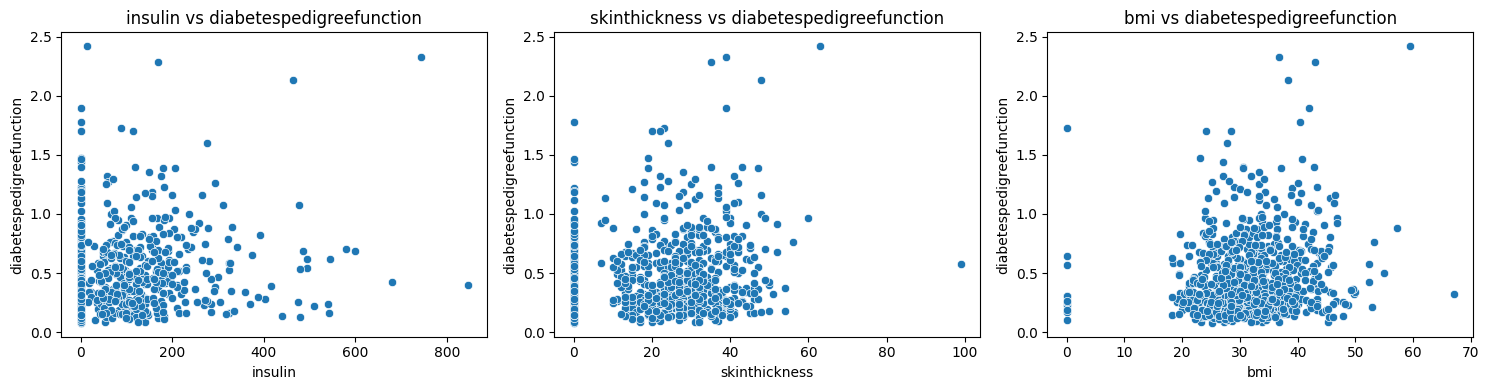

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

best_vars = ['insulin', 'skinthickness','bmi']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, var in enumerate(best_vars):
    sns.scatterplot(x=var, y='diabetespedigreefunction', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs diabetespedigreefunction')
plt.tight_layout()
plt.show()


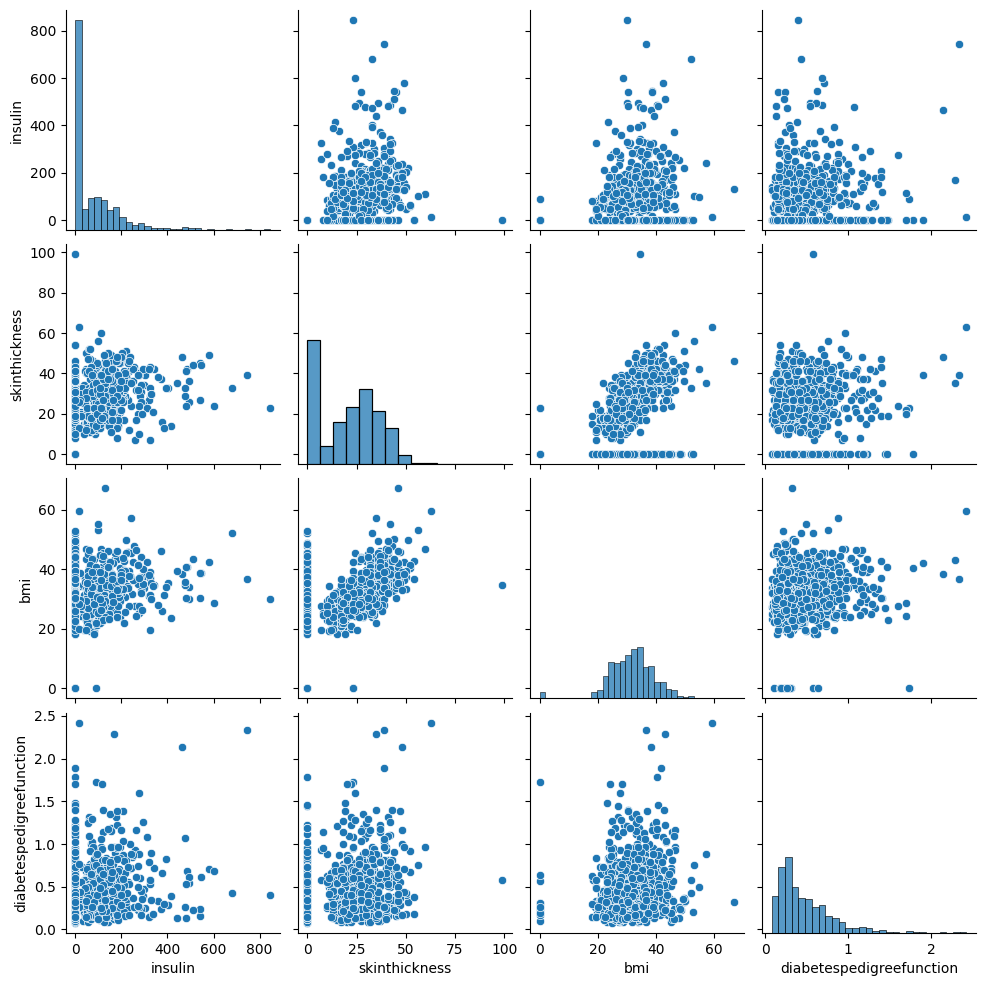

In [36]:
sns.pairplot(df, vars=["insulin", "skinthickness", "bmi", "diabetespedigreefunction"])
plt.show()


In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de vuelta a DataFrame manteniendo nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,insulin,skinthickness,bmi
0,-0.692891,0.907270,0.204013
1,-0.692891,0.530902,-0.684422
2,-0.692891,-1.288212,-1.103255
3,0.123302,0.154533,-0.494043
4,0.765836,0.907270,1.409746


*Dividir los Datos*

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
X_train.head()

,insulin,skinthickness,bmi
60,-0.692891,-1.288212,-4.060474
618,-0.692891,0.217261,-0.481351
346,0.027790,-0.096379,-0.417892
294,-0.692891,-1.288212,-1.280942
231,2.519781,1.032726,1.803195


In [40]:
X_test.head()

,insulin,skinthickness,bmi
668,0.956860,0.781814,0.254780
324,-0.692891,0.719086,0.470543
624,-0.692891,-1.288212,-0.151361
690,-0.692891,-1.288212,-0.938260
473,-0.692891,-1.288212,-0.265588


*Modelado y Entrenamiento*

In [45]:
modelo = LinearRegression()

# buscar los patrones con la data de X entrenamiento y el y de entrenamiento
modelo.fit(X_train, y_train)


LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [47]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MÉTRICAS DE REGRESIÓN:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Interpretación del R²
print(f"\nINTERPRETACIÓN:")
print(f"El modelo explica el {r2*100:.1f}% de la variabilidad en la progresión de diabetes")

MÉTRICAS DE REGRESIÓN:
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.29
Mean Absolute Error (MAE): 0.23
R² Score: 0.0899

INTERPRETACIÓN:
El modelo explica el 9.0% de la variabilidad en la progresión de diabetes


In [48]:
# Ver coeficientes (qué variables son importantes)
print("Coeficientes:", modelo.coef_)

Coeficientes: [0.03325046 0.03582786 0.02490737]


[Metricas de regression lineal](https://medium.com/@nicolasarrioja/m%C3%A9tricas-en-regresi%C3%B3n-5e5d4259430b)

In [49]:
# Obtener coeficientes
coeficientes = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': modelo.coef_,
    'Absoluto': np.abs(modelo.coef_)
})

# Ordenar por importancia absoluta
coeficientes = coeficientes.sort_values('Absoluto', ascending=False)

print("COEFICIENTES DEL MODELO (Ordenados por importancia):")
print(coeficientes.to_string(index=False))

# Interpretación de coeficientes
print(f"\nINTERPRETACIÓN DE COEFICIENTES:")
print("Coeficientes POSITIVOS: Aumentan la progresión de diabetes")
print("Coeficientes NEGATIVOS: Disminuyen la progresión de diabetes")
print(f"Intercepto: {modelo.intercept_:.4f}")

COEFICIENTES DEL MODELO (Ordenados por importancia):
Característica  Coeficiente  Absoluto
 skinthickness     0.035828  0.035828
       insulin     0.033250  0.033250
           bmi     0.024907  0.024907

INTERPRETACIÓN DE COEFICIENTES:
Coeficientes POSITIVOS: Aumentan la progresión de diabetes
Coeficientes NEGATIVOS: Disminuyen la progresión de diabetes
Intercepto: 0.4690


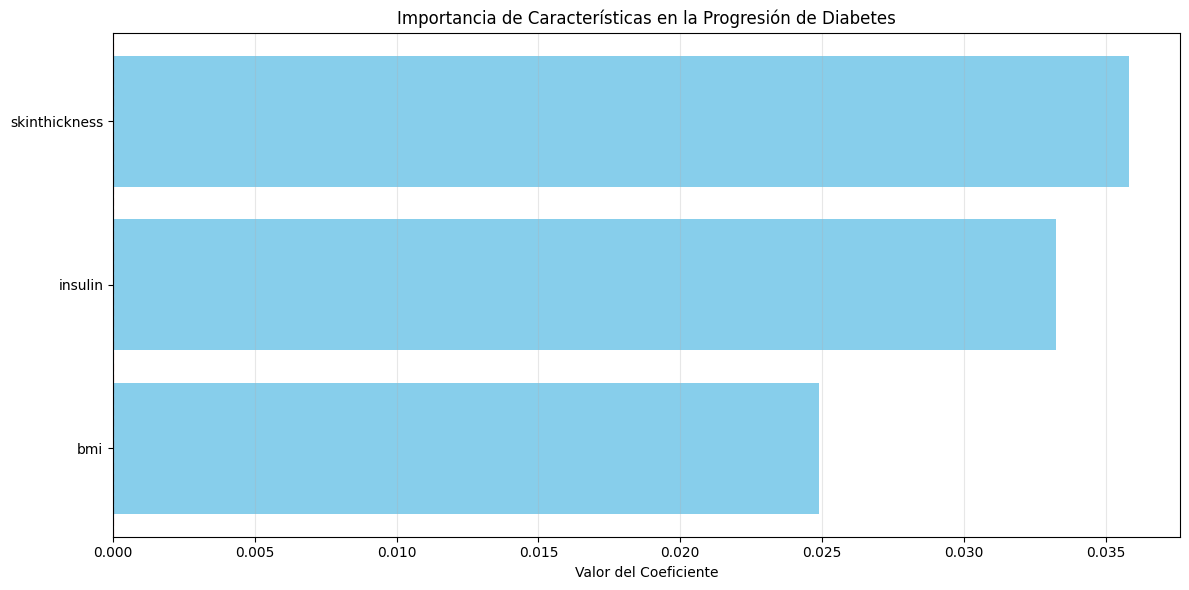

In [50]:
plt.figure(figsize=(12, 6))
coef_plot = coeficientes.sort_values('Coeficiente', ascending=True)
plt.barh(coef_plot['Característica'], coef_plot['Coeficiente'], color='skyblue')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.8)
plt.xlabel('Valor del Coeficiente')
plt.title('Importancia de Características en la Progresión de Diabetes')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()